# Computational Optimal Transport

## はじめに



## Sinkhornの更新式
$u^{(l+1)} \equiv \frac{a}{Kv}$, $v^{(l+1)} \equiv \frac{b}{K^\top u}$

In [1]:
import numpy as np
import pylab as plt

In [2]:
from scipy.stats import norm


t = np.arange(0, 1, 0.01)
mean = 0.3
std = 0.1

a = norm.pdf(t, mean, np.abs(std))


t = np.arange(0, 1, 0.02)

mean1 = 0.2
std1 = 0.05

mean2 = 0.7
std2 = 0.1

b = 0.4 * norm.pdf(t, mean1, np.abs(std1)) + 0.6 * norm.pdf(t, mean2, np.abs(std2))

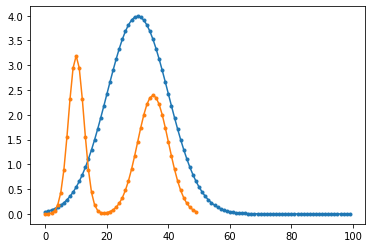

In [3]:
plt.plot(a, marker=".")
plt.plot(b, marker=".")

plt.show()

$u^{(l+1)} \equiv \frac{a}{Kv}$, $v^{(l+1)} \equiv \frac{b}{K^\top u}$

$f = \epsilon \log a - \epsilon \log K e^{g^{(l)}/\epsilon}$

$g = \epsilon \log b - \epsilon \log K^\top e^{g^{(l)}/\epsilon}$

In [4]:
C = (np.expand_dims(a, 0) - np.expand_dims(b, 1))**2

In [25]:
n = a.shape[0]
m = b.shape[0]

epsilon =  0.001

K = np.exp(-C/epsilon).transpose()

In [26]:
f = np.ones(n)

In [27]:
for i in range(20):    
    g = epsilon * np.log(b) - epsilon * np.log(K.transpose() @ np.exp(f))
    f = epsilon * np.log(a) - epsilon * np.log(K @ np.exp(g))

In [28]:
P = np.diag(np.exp(f/epsilon)) @ K @ np.diag(np.exp(g/epsilon))

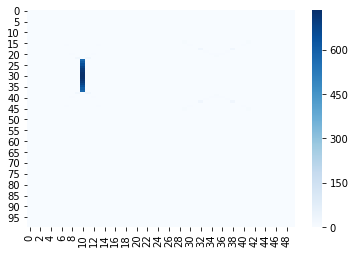

In [29]:
import seaborn as sns

sns.heatmap(P, cmap="Blues")
plt.show()